Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Triple-Ten, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Inicialmente crearé variables para cada archivo de datos para poder trabajarlos por separado (y en el futuro quizá unirlos), verificaré que tipo de datos contiene, cuantas columnas posee, si contiene datos vacíos ó indicios que me ayuden a familiarizarme con los datos a analizar.

In [1]:
# importar librerías
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv('/datasets/instacart_orders.csv',delimiter=';')
df_products = pd.read_csv('/datasets/products.csv', delimiter=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', delimiter=';')
df_departments = pd.read_csv('/datasets/departments.csv', delimiter=';')
df_order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Buen trabajo con la carga y lectura de datos, bien por encontrar el separador ;  </div>

In [3]:
# mostrar información del DataFrame
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Inicialmente no podía leer correctamente los datos, revisando mis notas e investigando un poco intenté ocn "delimiter" y fué de gran ayuda. 

Además, veo que existen datos vacíos en distintas tablas. dependiendo de cómo se presenten los casos se puede manejar dicha información, aunque lo mejor sería trabajarlos desde un inicio. 


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
¡Felicitaciones por incluir conclusiones intermedias en su proyecto! Esto es una práctica excelente ya que ayuda a comprender mejor los datos y a tomar decisiones informadas en la siguiente etapa del análisis. Continúa haciendo esto en futuros proyectos.</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

**Los valores ausentes puede originarse a errores humanos al ingresar manualmente los datos, por lo que puede causar omisiones, también, el cliente pudo haber llenado el registro de una manera incompleta.**

**Respecto a los valores duplicados, podrían ocurrir al comninar datos de diferentes fuentes/tablas, lo que conllevaría, nuevamente, a un error humano. Leí también que a veces ocurre por problemas en actualizaciones, ya que los registros pueden actualizarse.**

## Plan de solución

- **Verificar/convertir** 

    Los tipos de datos con astype() para serciorar que se trabajará con los tipos de Datos correctos.
    
- **Completar Valores nulos**
    
    luego completar valores nulos utilizando fillna() en tablas "df_orders" y "df_products", por ejemplo. Asimismo, se completaría con un valor 'Unknown'. 

- **Identificar y eliminar duplicados**
    
    Al centrarme en identificar los duplicados puedo, posteriormente eliminar/limpiar filas para una mejor lectura y comprension. Utilizaremos .duplicated().sum() y .drop_duplicates en ambos casos.
    

<div class="alert alert-block alert-warning">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
Buen trabajo con el plan del proyecto, es claro y conciso. Te aconsejo sacar más partido a markdown usando opciones avanzadas. Prueba lo siguiente para usar listas y comunicar de mejor forma. 
```markdown
## Plan de solución para el Paso 2: Preprocesamiento de los datos

- **Verificar y Convertir Tipos de Datos:**
  - Utilizar `astype()` para asegurar que los tipos de datos en los DataFrames sean correctos, especialmente para identificadores y categorías.

- **Completar Valores Nulos:**
  - Emplear `fillna()` para manejar los valores nulos en las tablas `df_orders` y `df_products`. Esto podría implicar el uso de valores promedio, medianos o un marcador como 'Desconocido'.

- **Identificación y Eliminación de Duplicados:**
  - Utilizar `.duplicated().sum()` para identificar filas duplicadas en los DataFrames necesarios.
  - Aplicar `.drop_duplicates()` para eliminar estas filas duplicadas y limpiar los datos.

Estas acciones formarán una base sólida para el análisis de datos en las siguientes etapas del proyecto.


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados

print("Los duplicados de Orders son: ", df_orders.duplicated().sum())
print('================================')
print('================================')
duplicates_df_orders = df_orders[df_orders.duplicated()]
print(duplicates_df_orders)


Los duplicados de Orders son:  15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común

**Si, todas tienen en común que pertenecen al Miércoles (order_dow == 3)**

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

mier_2am_orders = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]
mier_2am_orders.head()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>

<p>Buen trabajo, pero... Es esencial que revises todos los objetos de tipo dataframe y evites el uso de la función <code>print</code> para su visualización.</p>

<p>En Jupyter Notebook, al ejecutar una celda que contiene el nombre de un dataframe, este se muestra automáticamente en un formato tabular bien estructurado, lo cual facilita su lectura y análisis. Por el contrario, cuando utilizas <code>print</code> para mostrar un dataframe, se pierde este formato, lo que resulta en una visualización menos clara y más difícil de interpretar.</p>

<p>Por ejemplo, si tienes un dataframe llamado <code>df_order_products</code> y deseas visualizar sus primeras filas, simplemente escribe <code>df_order_products.head()</code> en una celda y ejecútala. Verás que el resultado es una tabla bien formateada, mucho más legible que si usaras <code>print(df_order_products.head())</code>.</p>

<b>**Revisa y ajusta todos los dataframes en tu notebook para asegurar una presentación clara y profesional de tus datos.** Esta práctica no solo mejorará la estética de tu notebook, sino que también facilitará la comprensión y el análisis de los datos presentados.</b>

<!-- Fin del Comentario del Revisor -->

</div>

¿Qué sugiere este resultado?

que existen duplicados los días miercoles a las 2am. Sin embargo no existen duplicados en order_id

In [10]:
# Elimina los pedidos duplicados
df_orders = df_orders.drop_duplicates().reset_index(drop=True) #Corregido!


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Buen trabajo con utilizar la función, pero no olvides utilizar reset_index despues de operaciones destructivas a los dataframes, esto mantendrá la consistencia de los indices. </div>

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_orders.duplicated().sum())


0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_orders['order_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Primero se identificaron si existían duplicados, luego se descubrió que los duplicados, coincidentemente se presentaba los miercoles a las 2am. Luego, se eliminaron los duplicados del dataframe df_orders, posteriormente se hizo la verificación si aun quedaba duplicidad y si existían IDs duplicados de pedidos.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().sum())
print(df_products[df_products.duplicated()])
print('==================')
print(df_products.isnull().sum())

0
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
print(df_products['product_id'].duplicated().sum())

0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name_mayus']=df_products['product_name'].str.upper()
dup_product_name = df_products['product_name_mayus'].duplicated().sum()
print(dup_product_name)

1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products_not_null = df_products.dropna(subset=['product_name'])
dup_product_names_not_null = df_products_not_null['product_name_mayus'].duplicated().sum()
print(dup_product_names_not_null)

104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Inicialmente no se encontraron filas enteramente duplicadas en df_products. La columna product_name contenía 1258 valores nulos. No hay IDs duplicadas en la columna product_id. Se identificaron 1361 productos. finalmente, al considerar nombres no faltantes se identificaron 104 nombres duplicados.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas

print(df_departments.duplicated().sum())
df_departments.info()
print('============')
duplicates_df_departments = df_departments[df_departments.duplicated()] #en el anterior ejercicio lo he ejecutado directamente con un print. Me recomienda que cree una variable, como en este caso, o que lo llame con un print)
print(duplicates_df_departments)


0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
Empty DataFrame
Columns: [department_id, department]
Index: []


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_departments['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron filas totalmente duplicadas en el DataFrame analizado. tampoco exsten ids duplicadas en la columna department_id del DataFrame df_departments.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
duplicates_df_aisles = df_aisles[df_aisles.duplicated()]
print(duplicates_df_aisles)
print('===============')
df_aisles.info() #intento llamarlo siempre para saber cómo está formado el df que analizo.

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_aisles['aisle_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

De la misma manera, no se encontraron filas totalmente duplicadas, asimismo, tampoco existen IDs duplicados en la columna correspondiente aisle_id.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
duplicates_df_order_products = df_order_products[df_order_products.duplicated()]
print(duplicates_df_order_products)
print('===============')
df_order_products.info()

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

# Verificar otros posibles duplicados engañosos
other_dup_df_order_products = df_order_products[df_order_products.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order', 'reordered'], keep=False)]
print(other_dup_df_order_products)



Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron filas totalmente duplicadas. También, no se encontraron posibles duplicados engañosos al considerar todas las columnas.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'

miss_product_name = df_products[df_products['product_name'].isnull()]
print(miss_product_name)

       product_id product_name  aisle_id  department_id product_name_mayus
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


Describe brevemente cuáles son tus hallazgos.

Se encontraron 1258 filas de la tabla df_products que la columna 'product_name' tiene valores ausentes.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

miss_product_name_aisle100 = miss_product_name[miss_product_name['aisle_id']==100]
print(miss_product_name_aisle100)

       product_id product_name  aisle_id  department_id product_name_mayus
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


Describe brevemente cuáles son tus hallazgos.

Si, todos los nombres del pasillo id 100 son ausentes. 

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
miss_product_name_dpt21 = miss_product_name[miss_product_name['department_id']==21]
print(miss_product_name_dpt21)

       product_id product_name  aisle_id  department_id product_name_mayus
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


Describe brevemente cuáles son tus hallazgos.

si, todos los nombres ausentes relacionados con department_id==21 son ausentes


In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
miss_product_name_dpt21 = miss_product_name_aisle100[miss_product_name_aisle100['department_id']==21]
print(miss_product_name_dpt21)


       product_id product_name  aisle_id  department_id product_name_mayus
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


Describe brevemente cuáles son tus hallazgos.


Se puede concluir que todos los nombres de productos del aisle_id == 100 y al department_id == 21 están relacionados en que tienen valores ausentes

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'

df_products['product_name'].fillna('Unknown', inplace=True)
df_products['product_name_mayus'].fillna('UNKNOWN', inplace=True)
print(df_products['product_name'].isnull().sum())
print('===============')
print(df_products.loc[37])
print('===============')


0
product_id                 38
product_name          Unknown
aisle_id                  100
department_id              21
product_name_mayus    UNKNOWN
Name: 37, dtype: object


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Basicamente lo que se hizo fué cambiar todos los product_name NaN a Unknown respectivamente. Se aplicó lo mismo para la columna que creamos en mayúscula. 

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
miss_df_orders = df_orders.isnull().sum()
print(miss_df_orders)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
miss_df_order_noprior = df_orders[(df_orders['days_since_prior_order'].isnull())&(df_orders['order_number']>1)]
print(miss_df_order_noprior)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Los valores ausentes en esta columna corresponden al primer pedido de cada cliente. Esto puede ser útil si se desea tratar de una manera particular estos valores ausentes a diferencia del resto.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
miss_df_order_products = df_order_products.isnull().sum()
print(miss_df_order_products)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
minvalues_miss_df_order_products = df_order_products['add_to_cart_order'].min()
maxvalues_miss_df_order_products = df_order_products['add_to_cart_order'].max()
print(minvalues_miss_df_order_products)
print(maxvalues_miss_df_order_products)

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

El valor minimo para agregar al carrito es 1 y el máximo es 64. 


In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_add_to_cart_order_ids = df_order_products[df_order_products['add_to_cart_order'].isnull()]['order_id'].unique()
print(missing_add_to_cart_order_ids)



[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
missing_add_to_cart_order_products = df_order_products[df_order_products['order_id'].isin(missing_add_to_cart_order_ids)]
all_orders_have_more64p = all(missing_add_to_cart_order_products.groupby('order_id')['product_id'].count() > 64)
print(all_orders_have_more64p)


# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
missing_add_to_cart_order_groups = missing_add_to_cart_order_products.groupby('order_id')['product_id'].count()


# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
min_missing_add_to_cart_order_count = missing_add_to_cart_order_groups.min()

print(f"Valor mínimo del conteo de 'product_id' en pedidos con datos ausentes: {min_missing_add_to_cart_order_count}")

True
Valor mínimo del conteo de 'product_id' en pedidos con datos ausentes: 65


Describe brevemente cuáles son tus hallazgos.

El resultado indica que todos los pedidos con valores ausentes en 'add_to_cart_order' tienen más de 64 productos. El valor minimo de conteo de product_id en estos pedidos es 64. tal vez no se ingresaron correctamente en add_to_cart_order

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'].fillna(999, inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)

print(df_order_products['add_to_cart_order'].isnull().sum())
print(df_order_products['add_to_cart_order'].dtype)




0
int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al tener valores nulos en 0 y el tipo de dato sea int64 indique que se realizó correctamente la sustitución de valores nulos por 999 y se convirtió en tipo de dato entero. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
¡Muy bien! 👏👏 Los cálculos de esta sección están correctos y eso es un gran logro. Sigue así y verás cómo poco a poco te irás convirtiendo en un experto en esta área. 💪💻</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Se verificaron y corrigieron los tipos de datos en los DF para asegurarse que las columnas ID sean numeros enteros. 
También se identidicaron y revisaron valores ausentes como en 'product_name' en el df de productos, 'days_since_prior_order' en df de pedidos y 'add_to_cart_order' en el df de pedidos. 
Se completaron valores ausentes utilizando diferentes estrategias como llenar con Unkown y 999 para que no existan datos vacíos. 

Se identificaron y eliminaron valores duplicados en varios DF, se utilizaron estrategias especificas como la verificacion de pedidos realizados en un día y una hora para determinar cierta duplicidad. 

En síntesis, el paso 2 fue exitoso en la corrección de datos, identificacion y manejo de valores ausentes, asi como la eliminacion de valores duplicados. 

Si bien es cierto, existe un mundo de posibilidades para saber qué hacer exactamente con los datos, las guías que proporcionan son de gran ayuda ya que uno va generando un criterio para ir encontrando respuestas.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:

unique_hours = df_orders['order_hour_of_day'].unique()
print("Valores únicos en 'order_hour_of_day':", unique_hours)

unique_days = df_orders['order_dow'].unique()
print("Valores únicos en 'order_dow':", unique_days)


Valores únicos en 'order_hour_of_day': [13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]
Valores únicos en 'order_dow': [6 5 0 4 3 1 2]


Escribe aquí tus conclusiones

Efectivamente, los valores en ambas columnas son razonables y se encuentran dentro del rango esperado. 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

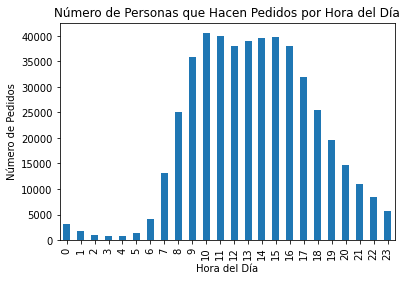

In [57]:

# Crear un DataFrame con el conteo de pedidos por hora del día
hourly_order_count = df_orders['order_hour_of_day'].value_counts().sort_index()
df_hourly_order_count = pd.DataFrame({'Hora del Día': hourly_order_count.index, 'Número de Pedidos': hourly_order_count.values})

# Gráfico de barras con el formato deseado
df_hourly_order_count.plot(
    x='Hora del Día',
    y='Número de Pedidos',
    kind='bar',
    title='Número de Personas que Hacen Pedidos por Hora del Día',
    xlabel='Hora del Día',
    ylabel='Número de Pedidos',
    legend=False  
)

plt.show()    #Corregido!



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
¡Muy bien! la gráfica y la operación es correcta. Sin embargo, no olvides mantener la seccio4n de imports al inicio del notebook para evitar carga duplicada de paqueteds</div>

Escribe aquí tus 

Existe, claramente, un alta significativa desde las 9 hasta las 5. Horas en las que las personas podrían pedir para su desayuno, almuerzo y merienda. Luego sufre una caída según pasan las horas, sin embargo, no llega a ser cero, ya que se refleja que hay personas que también piden de noche. 

### [A3] ¿Qué día de la semana compran víveres las personas?

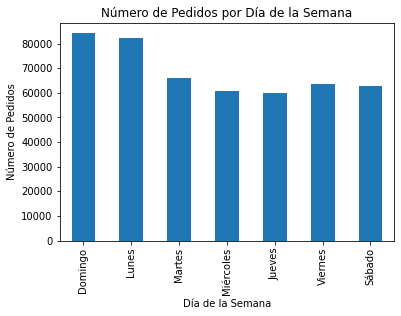

In [58]:

# conteo de pedidos por día de la semana
weekday_order_count = df_orders['order_dow'].value_counts().sort_index()
df_weekday_order_count = pd.DataFrame({'Día de la Semana': weekday_order_count.index, 'Número de Pedidos': weekday_order_count.values})

# mapear días de la semana
mapeo = {0: 'Domingo', 1: 'Lunes', 2: 'Martes', 3: 'Miércoles', 4: 'Jueves', 5: 'Viernes', 6: 'Sábado'}
df_weekday_order_count['Día de la Semana'] = df_weekday_order_count['Día de la Semana'].map(mapeo)
# curiosidad: el .map() lo ví por primera vez en kaggle y me pareció de gran ayuda en este caso

# Gráfico de barras
df_weekday_order_count.plot(
    x='Día de la Semana',
    y='Número de Pedidos',
    kind='bar',
    title='Número de Pedidos por Día de la Semana',
    xlabel='Día de la Semana',
    ylabel='Número de Pedidos',
    legend=False  
)

plt.show()  #Corregido!


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
¡Muy bien! la gráfica y la operación es correcta. Sin embargo, no olvides mantener la seccio4n de imports al inicio del notebook para evitar carga duplicada de paqueteds</div>

Escribe aquí tus conclusiones

Los días en los que más se realizan compras son los domingos y lunes. y en los que menos los Miércoles y jueves. Teniendo estos opuestos se pueden tomar decisiones. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

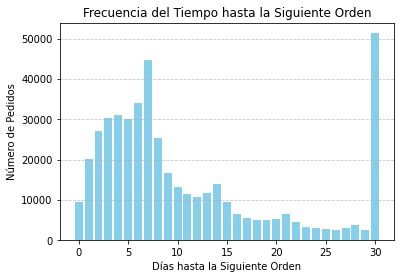

In [59]:

df_orders_cleaned = df_orders.dropna(subset=['days_since_prior_order'])

#gráfico de barras
plt.bar(df_orders_cleaned['days_since_prior_order'].value_counts().index,
        df_orders_cleaned['days_since_prior_order'].value_counts().values,
        color='skyblue')

plt.title('Frecuencia del Tiempo hasta la Siguiente Orden')
plt.xlabel('Días hasta la Siguiente Orden')
plt.ylabel('Número de Pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Corregido!


Escribe aquí tus conclusiones

Aproximadamente, en el día 7 y 30 es donde realizan más pedidos. y donde hacen menos es en el día 25

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
<p>Gran trabajo en esta sección. Las verificaciones y visualizaciones son claras y efectivas. Destaca el uso adecuado de <strong>value_counts</strong> y <strong>count</strong> para el análisis. Ahora, te animo a <strong>dedicar tiempo mejorar el estilo de código removiendo imports duplicados. </strong> para resaltar los hallazgos más significativos de tu análisis.</p>
<p>¡Continúa con este excelente enfoque!</p></div>


# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

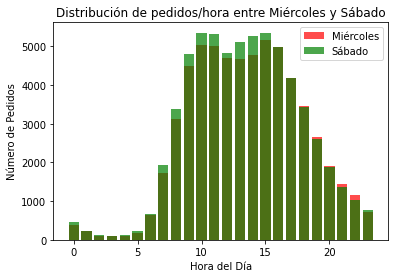

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# obtener solo los miércoles y sábados
df_wednesday = df_orders[df_orders['order_dow'] == 3]  
df_saturday = df_orders[df_orders['order_dow'] == 5]   

# Crea un gráfico de barras para comparar las distribuciones
plt.bar(df_wednesday['order_hour_of_day'].value_counts().index,
        df_wednesday['order_hour_of_day'].value_counts().values,
        color='red',
        alpha=0.7,
        label='Miércoles')

plt.bar(df_saturday['order_hour_of_day'].value_counts().index,
        df_saturday['order_hour_of_day'].value_counts().values,
        color='green',
        alpha=0.7,
        label='Sábado')

plt.title('Distribución de pedidos/hora entre Miércoles y Sábado')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.legend()
plt.show()


Escribe aquí tus conclusiones

Se observa que el numero de pedidos, en los días Miércoles y sábado son similares, sin embargo, en los puntos máximos de pedidos de ambos días (de 10hrs a 15hrs en ambos casos), el día sábado lo supera por poco. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

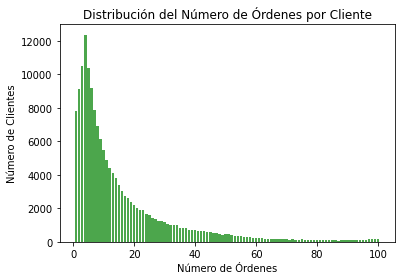

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que df_orders contenga la columna 'user_id' y 'order_number'
# df_orders = ...

# Calcula el número de órdenes por cliente
orders_per_user = df_orders.groupby('user_id')['order_number'].max()

# Cuenta la frecuencia de cada número de órdenes
order_counts = orders_per_user.value_counts().sort_index()

# Crea un gráfico de barras para la distribución
plt.bar(order_counts.index, order_counts.values, color='green', alpha=0.7)
plt.title('Distribución del Número de Órdenes por Cliente')
plt.xlabel('Número de Órdenes')
plt.ylabel('Número de Clientes')
plt.show()


Escribe aquí tus conclusiones

El numero de ordenes por clientes es mayor al inicio. Posee una tendencia de mayor uso del servicio al inicio. Teniendo su clientela recurrente del servicio muy baja en el transcurso del tiempo, ya que pocos son los que sobrepasan las 20 ordenes por cliente. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [41]:
import pandas as pd

# Combinando df_order_products y df_products para obtener información sobre los productos
merged_df = pd.merge(df_order_products, df_products[['product_id', 'product_name']], on='product_id', how='inner')

# frecuencia de cada producto
top_products = merged_df['product_id'].value_counts().head(20)

# Muestra la identificación y el nombre de los 20 principales productos
top_products_info = df_products[df_products['product_id'].isin(top_products.index)][['product_id', 'product_name']].drop_duplicates()

print(top_products_info)


       product_id              product_name
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
13175       13176    Bag of Organic Bananas
16796       16797              Strawberries
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
22934       22935      Organic Yellow Onion
24851       24852                    Banana
24963       24964            Organic Garlic
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
28203       28204        Organic Fuji Apple
39274       39275       Organic Blueberries
40705       40706    Organic Grape Tomatoes
45006       45007          Organic Zucchini
47208       47209      Organic Hass Avocado
47625       47626               Large Lemon
47765       47766           Organic Avocado
49682       49683            Cucumber Kirby


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
<p>Gran trabajo. La respuesta es correcta. Bien hecho al hacer los merge y manejar el conteo. 

Escribe aquí tus conclusiones

Los 20 productos mas populares se muestran en la lista. Todos liderados por el Limon orgánico con el product_od 5876. 

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [60]:

products_per_order = df_order_products.groupby('order_id')['product_id'].count()

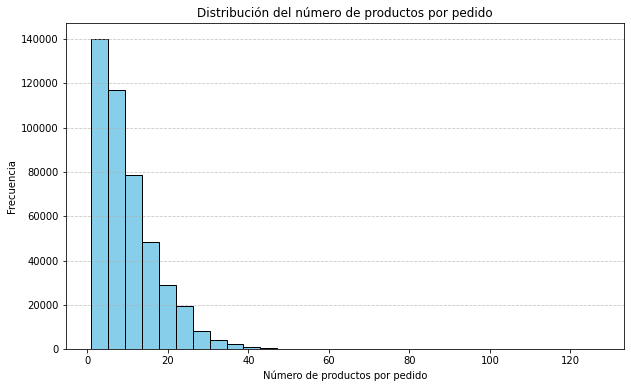

In [61]:
# Visualiza la distribución con un histograma
plt.figure(figsize=(10, 6))
plt.hist(products_per_order, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del número de productos por pedido')
plt.xlabel('Número de productos por pedido')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [62]:
print(products_per_order.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


Escribe aquí tus conclusiones

Se puede observar que la frecuencia de numero de productos por pedidos es cada vez más alta al inicio. Asimismo, en promedio es de 10 teniendo en cuenta que el pedido minimo es de 1 y máximo de 127.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [63]:
import pandas as pd

# Agrupa por producto y cuenta la frecuencia de reorden
product_reordered_counts = df_order_products.groupby('product_id')['reordered'].mean()  #Corregido!

# Ordena los productos por frecuencia de reorden en orden descendente
top_reordered_products = product_reordered_counts.sort_values(ascending=False).head(20)

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Reorder nos indica una <b>proporción</b> por lo tanto debes usar la función mean() y no sum()</div>


In [64]:
# Fusiona las tablas df_products y top_reordered_products 
top_products_info = df_products[df_products['product_id'].isin(top_reordered_products.index)]
# Fusiona las tablas 'top_reordered_products' y 'top_products_info' en función del ID del producto
result = pd.merge(top_reordered_products, top_products_info, left_index=True, right_on='product_id')

In [65]:
result = result[['product_id', 'reordered', 'product_name']]
result.columns = ['ID del Producto', 'Frecuencia de Reorden', 'Nombre del Producto']

In [48]:
print(result)


       ID del Producto  Frecuencia de Reorden  \
14720            14721                    1.0   
20948            20949                    1.0   
6722              6723                    1.0   
6731              6732                    1.0   
45087            45088                    1.0   
45077            45078                    1.0   
21015            21016                    1.0   
21004            21005                    1.0   
35191            35192                    1.0   
35196            35197                    1.0   
6809              6810                    1.0   
45039            45040                    1.0   
45034            45035                    1.0   
27372            27373                    1.0   
30747            30748                    1.0   
45030            45031                    1.0   
35136            35137                    1.0   
30746            30747                    1.0   
35227            35228                    1.0   
35228            352

Escribe aquí tus conclusiones

El producto BANANA es el producto que se vuelve a pedir con mas frecuencia. Tambien que la mayoria de productos son organicos. Con esta información son muy útiles para estrategias de mkt y gestión de inventarios.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [49]:
import pandas as pd

# Calcular la frecuencia de repeticiones de pedido por producto
reorder_counts = df_order_products.groupby('product_id')['reordered'].sum()
total_counts = df_order_products.groupby('product_id')['reordered'].count()

# Calcular la tasa de repetición del pedido
reorder_ratio = reorder_counts / total_counts

In [50]:
# Crear un DataFrame con los resultados
result_df = pd.DataFrame({
    'product_id': reorder_ratio.index,
    'reorder_ratio': reorder_ratio.values
})

result_df = pd.merge(result_df, df_products[['product_id', 'product_name']], on='product_id')

In [51]:
print(result_df.head())

   product_id  reorder_ratio  \
0           1       0.564286   
1           2       0.000000   
2           3       0.738095   
3           4       0.510204   
4           7       0.500000   

                                        product_name  
0                         Chocolate Sandwich Cookies  
1                                   All-Seasons Salt  
2               Robust Golden Unsweetened Oolong Tea  
3  Smart Ones Classic Favorites Mini Rigatoni Wit...  
4                     Pure Coconut Water With Orange  


Escribe aquí tus conclusiones

Este análisis proporciona información valiosa sobre el comportamiento de compra de los clientes con respecto a cada producto, sin embargo, me gustaría, por favor, que el revisor de mi proyecto me guíe en cómo podría obtener el user id sin que se modifique. cuando

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [52]:
import pandas as pd

# Conectar las tablas para obtener información de usuario en df_order_products
df_order_info = pd.merge(df_order_products, df_orders[['order_id', 'user_id']], on='order_id', how='left')

# Crear un DataFrame con la frecuencia de pedido por usuario y producto
user_product_counts = df_order_info.groupby(['user_id', 'product_id'])['order_id'].count().reset_index()

# Crear una columna que indique si el producto fue pedido más de una vez
user_product_counts['reordered'] = user_product_counts['order_id'].apply(lambda x: 1 if x > 1 else 0)

# Calcular la tasa de repetición de pedido por usuario
average_reorder_ratio_user = user_product_counts.groupby('user_id')['reordered'].mean().reset_index()

# Crear un DataFrame con los resultados
result_user_df = pd.DataFrame({
    'user_id': average_reorder_ratio_user['user_id'],
    'average_reorder_ratio': average_reorder_ratio_user['reordered']
})

# Mostrar los resultados
print(result_user_df.head())


   user_id  average_reorder_ratio
0        2               0.040000
1        4               0.000000
2        5               0.000000
3        6               0.000000
4        7               0.076923


Escribe aquí tus conclusiones

Por favor algún indicio para resolver esta parte. Según yo, debería de resultarme el user_id sin modificarse (pero cuando no utilizo el reset index me sale error)


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [53]:
import pandas as pd

# Obtener los productos más comunes en la posición 1 del carrito
top_first_cart_items = df_order_products[df_order_products['add_to_cart_order'] == 1]['product_id'].value_counts().head(20)

In [54]:
# Fusionar las tablas df_products y top_first_cart_items para obtener información del producto
result = pd.merge(top_first_cart_items.reset_index(), df_products[['product_id', 'product_name']], left_on='index', right_on='product_id')

In [55]:
result.columns = ['ID del Producto', 'Cantidad en Primer Carrito', 'ID del Producto', 'Nombre del Producto']

# Mostrar los resultados
print(result)

    ID del Producto  Cantidad en Primer Carrito  ID del Producto  \
0             24852                       15562            24852   
1             13176                       11026            13176   
2             27845                        4363            27845   
3             21137                        3946            21137   
4             47209                        3390            47209   
5             21903                        3336            21903   
6             47766                        3044            47766   
7             19660                        2336            19660   
8             16797                        2308            16797   
9             27966                        2024            27966   
10            44632                        1914            44632   
11            49235                        1797            49235   
12            47626                        1737            47626   
13              196                        1733 

Escribe aquí tus conclusiones

Porporciona información valiosa respecto a los patrones de compra. Lo cual, puede servir para impulsar los mismos productos, nuevos productos y verse interrelacionado con distintos canales de produccion/distribución para tener más a la mano los productos más solicitados/intención de compra.

### Conclusion general del proyecto:

##### Resumen de Hallazgos Clave

- Se identificaron patrones de compra, preferencias de productos y comportamientos de los clientes en la plataforma Instacart.
- Se destacaron los productos más pedidos, la frecuencia de repetición y los artículos más comunes en los primeros carritos de compra.

##### Impacto de las elecciones en el Procesamiento de Datos

- En general, las elecciones tomadas al momento de la limpieza y procesamiento de datos influyeron en la calidad de los resultados. La resolucion de problemas como índices incorrectos, manipulacion de datos o repetición de los mismos ayudará a tomar decisiones futuras.

##### Relación con los Objetivos iniciales

- El análisis en general se relaciona claramente con los objetivos iniciales ya que, en el proceso, se comprende el comportamiento de compra de los lcientes y proporciona información útil para mejoras futuras.

##### Relevancia de los Hallazgos

- Dichos hallazgos son importantes para la toma de decisiones, a mi parecer, estratégicas en áreas de marketing, operaciones y hasta distribucion. Porque se comprende qué productos son populares y cómo los clientes interactúan con la plataforma es esencial para el éxito comercial.

##### Sugerencias y Recomendaciones

- Se sugiere a la app técnicas de recomendación entre productos para aumentar KPIs básicos para el seguimiento de objetivos. Asimismo, mejorará la experiencia del cliente.
- La atención contínua de la calidad de los datos y la exploracion de nuevas fuentes de datos (por ejemplo, se puede realizar campañas para obtener aún más datos) enriquecería aún más el análisis. 

##### Reflexiones finales

- A pesar de los desafíos encontrados, en primer lugar, la comprensión correcta del diccionario de datos, luego, la utilización de merge, tambien el reseteo de los índices... junto con iteración constante, ayudaron a resolver y trazar un camino por el cual son fundamentales para proporcionar insights significativos.

##### Recomendaciones Personales

- Me gustaría añadir que, el app estudiado, podría implementar un algoritmo predictivo que se involucre estrictamente con el inventario. Si bien es cierto, se sabe cuáles son los productos más pedidos (hasta los días y las horas), dicho algoritmo ayudaría a gestionar de manera mas efectiva el inventario reduciendo la posibilidad el agotamiento ó el overstock. Recordemos que nos referimos a productos perecibles, por lo tanto, el agotamiento significaría menos ventas y el overstock podría generar una degradación y merma con el paso de tiempo. 

- Asimismo explorar colaboración con agricultores y productores locales. Esto no solo promoverá un negocio sustentable, sino también brindará a los usuarios la opción de elegir productos más frescos y locales. 



<div class="alert alert-block alert-danger">
<b>Comentario del Final</b> <a class="tocSkip"></a>|
Al escribir las conclusiones finales, considera las siguientes pautas para que reflejen efectivamente tus hallazgos y decisiones:</b>
<br>
<b>🔍 Resumen de los Hallazgos Clave:</b> Incluye un resumen conciso de tus descubrimientos más importantes. Por ejemplo, menciona patrones interesantes, tendencias o anomalías que hayas identificado en los datos de Instacart.
<br>|
<b>🤔 Impacto de tus Elecciones de Procesamiento de Datos:</b> Reflexiona sobre cómo tus decisiones, como la forma en que manejaste los valores ausentes o duplicados, influyeron en los resultados. Explica cómo estas elecciones pudieron haber afectado tus hallazgos.
<br>
<b>🎯 Relación con los Objetivos Iniciales:</b> Relaciona tus conclusiones con los objetivos del proyecto. ¿Cómo tus hallazgos responden a las preguntas iniciales o cumplen con los objetivos del proyecto? Por ejemplo, si uno de los objetivos era entender los patrones de compra, explica cómo tu análisis abordó este punto.
<br>
<b>💡 Relevancia de los Hallazgos:</b> Discute la importancia de tus hallazgos en el contexto de Instacart como plataforma de entrega de comestibles. ¿Qué implicaciones tienen tus resultados para la empresa o sus usuarios?
<br>
<b>🚀 Sugerencias y Recomendaciones:</b> Basado en tus análisis, proporciona cualquier sugerencia o recomendación que podrías tener para Instacart. Por ejemplo, si identificaste un pasillo específico con alta frecuencia de pedidos, podrías sugerir estrategias de marketing centradas en ese pasillo.
<br>
<b>📝 Reflexiones Finales:</b> Concluye con tus pensamientos finales sobre el proyecto, incluyendo cualquier desafío que enfrentaste y lo que aprendiste en el proceso.
<br>
<b>Recuerda, una buena conclusión no solo resume tus hallazgos, sino que también ofrece insights y reflexiones sobre el impacto y relevancia de tu trabajo. Buena suerte con la etapa final de tu proyecto.</b>
</div>



<div class="alert alert-block alert-success">
<b>Comentario Final</b> <a class="tocSkip"></a>
<p>He revisado tu proyecto de Instacart y aquí van mis observaciones:</p>
<ul>
    <li>Excelente trabajo en el análisis de los datos. Tu enfoque ha sido meticuloso y bien pensado.</li>
    <li>Tus gráficos y visualizaciones son claros y efectivos, mostrando con precisión las tendencias y patrones.</li>
    <li><strong>Para aprobar el proyecto.:</strong> Te sugiero completar la pregunta C2 y  las secciones de conclusiones finales de acuerdo a la pauta que te indico. . Esto te ayudará a destacar los hallazgos clave y demostrará tu habilidad para sintetizar la información.</li>
    <li><strong>Si quieres mejorar más:</strong> Dale un vistazo a las correcciones sugeridas en amarillo, especialmente en lo que respecta al uso de funciones print y la asignación en tu código. Esto hará que tu trabajo sea aún más pulido.</li>
</ul>
<p>¡Estás haciendo un gran progreso en la ciencia de datos! Mantén el buen trabajo &#x1F680;.</p>
</div>

</div>
